In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
Customer = pd.read_csv('D:\Customer.csv')

In [4]:
Customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [5]:
Product_Hierarchy = pd.read_csv('D:\prod_cat_info.csv')

In [6]:
Product_Hierarchy.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [7]:
Transactions =pd.read_csv('D:\Transactions.csv')

In [8]:
Transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly. 

In [9]:
Customer_Trans = pd.merge(left = Customer,
                          right = Transactions,
                          left_on = 'customer_Id',
                          right_on = 'cust_id',
                          how = 'inner',
                          indicator = True)

In [10]:
Customer_Final = pd.merge(left = Customer_Trans,
                          right = Product_Hierarchy,
                          left_on = 'prod_cat_code',
                          right_on = 'prod_cat_code',
                          how = 'inner'
                          )


In [11]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,1,Women


# 2. Prepare a summary report for the merged data set.  
a. Get the column names and their corresponding data types 

b. Top/Bottom 10 observations

c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

d. Frequency tables for all the categorical variables 

# a.  Column names and their data types

In [12]:
Customer_Final.dtypes

customer_Id             int64
DOB                    object
Gender                 object
city_code             float64
transaction_id          int64
cust_id                 int64
tran_date              object
prod_subcat_code        int64
prod_cat_code           int64
Qty                     int64
Rate                    int64
Tax                   float64
total_amt             float64
Store_type             object
_merge               category
prod_cat               object
prod_sub_cat_code       int64
prod_subcat            object
dtype: object

# b. Top/Bottom 10 observations

In [13]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
5,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,6,DIY
6,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,7,Fiction
7,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,12,Academic
8,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,10,Non-Fiction
9,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,11,Children


In [14]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,09-12-1992,F,7.0,98631113719,274618,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,both,Clothing,3,Kids
99284,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,4,Mens
99285,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,1,Women
99286,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,3,Kids
99287,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,4,Mens
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,1,Women
99292,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,3,Kids


In [15]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,09-12-1992,F,7.0,98631113719,274618,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,both,Clothing,3,Kids
99284,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,4,Mens
99285,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,1,Women
99286,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,3,Kids
99287,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,4,Mens
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,1,Women
99292,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,3,Kids


# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [16]:
Data_min = Customer_Final['total_amt'].min()
Data_max = Customer_Final['total_amt'].max()
Data_q1  = np.percentile(Customer_Final.total_amt,25)
median  = np.percentile(Customer_Final.total_amt,50)
Data_q3  = np.percentile(Customer_Final.total_amt,75)
print('Min = ',Data_min)
print('Max = ',Data_max)
print('Median = ',median)
print('Q1 = ',Data_q1)
print('Q3 = ',Data_q3)


Min =  -8270.925
Max =  8287.5
Median =  1761.37
Q1 =  762.45
Q3 =  3585.725


# d. Frequency tables for all the categorical variables 

# Store Type

In [17]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['Store_type'])
freq_table.columns = ['TeleShop','MBR','e-shop','Flagshipstore']
freq_table.index = ['Male','Female']
freq_table

,TeleShop,MBR,e-shop,Flagshipstore
Male,9767,9687,9159,19589
Female,10047,10278,10142,20584


# prod_cat

In [18]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_cat'])
freq_table.columns = ['Books','Bags','Clothing','Footwear','Electronics','Home and kitchen']
freq_table.index = ['Male','Female']
freq_table

,Books,Bags,Clothing,Footwear,Electronics,Home and kitchen
Male,1988,17694,4317,11640,4587,7976
Female,2008,18696,4554,12850,4407,8536


# prod_subcat

In [19]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_subcat'])
freq_table.columns = ['Men','Women','Kid','Mobile','Computer','Personal Appliances','Cameras','Audio and video',
                      'Fiction','Academic','Non-fiction','Children','Comics','DIY','Furnishing','Kitchen',
                      'Bath','Tools']
freq_table.index = ['Male','Female']
freq_table


,Men,Women,Kid,Mobile,Computer,Personal Appliances,Cameras,Audio and video,Fiction,Academic,Non-fiction,Children,Comics,DIY,Furnishing,Kitchen,Bath,Tools
Male,2949,2328,1994,2328,2949,2949,2328,2949,2949,1994,2968,1994,3962,2328,2949,2328,1994,3962
Female,3116,2570,2134,2570,3116,3116,2570,3116,3116,2134,2987,2134,3991,2570,3116,2570,2134,3991


# 3. Generate histograms for all continuous variables and frequency bars for categorical variables. 

Histogram for continuous variables

# Tax

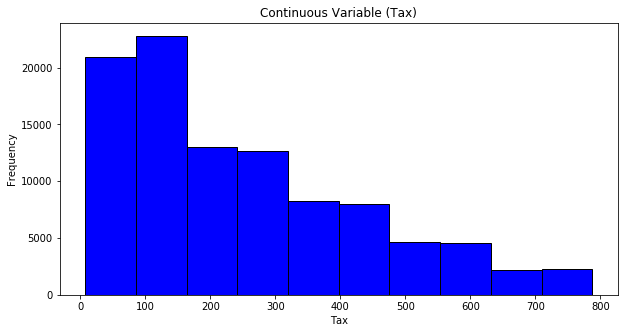

In [20]:
import matplotlib.pyplot as plt
Tax = Customer_Final["Tax"]

Tax.plot(kind="hist",edgecolor="black",color="blue",figsize=(10,5))
plt.xlabel("Tax")
plt.ylabel("Frequency")
plt.title("Continuous Variable (Tax)")

plt.show()


# Total ammount

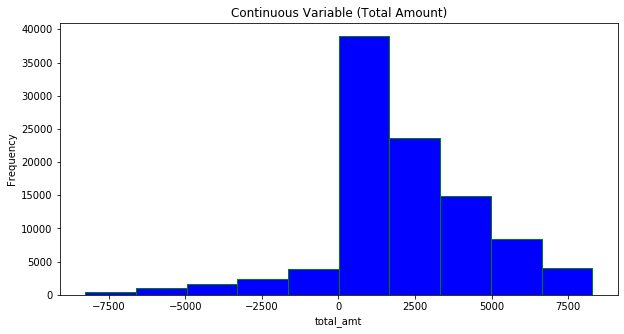

In [22]:
import matplotlib.pyplot as plt
total_amt = Customer_Final["total_amt"]
total_amt.plot(kind="hist",edgecolor="green",color="blue",figsize=(10,5))
plt.xlabel("total_amt")
plt.ylabel("Frequency")
plt.title("Continuous Variable (Total Amount)")
plt.show()


# Frequency Bar For Categorical variables

# Gender

C:\Users\POOJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Frenquency Bar For Categorical Variables GENDER')

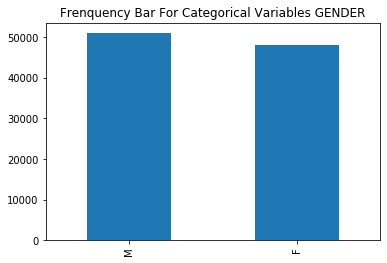

In [23]:
Customer_Final["Gender"].value_counts().plot("bar")
plt.title("Frenquency Bar For Categorical Variables GENDER", color ="black" )

# Store Type

C:\Users\POOJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


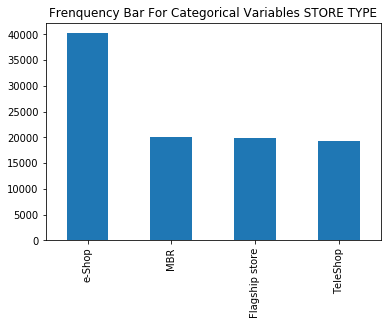

In [24]:
Customer_Final['Store_type'].value_counts().plot('bar')
plt.title("Frenquency Bar For Categorical Variables STORE TYPE", color ="black" )
plt.show()

# Product Category

C:\Users\POOJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


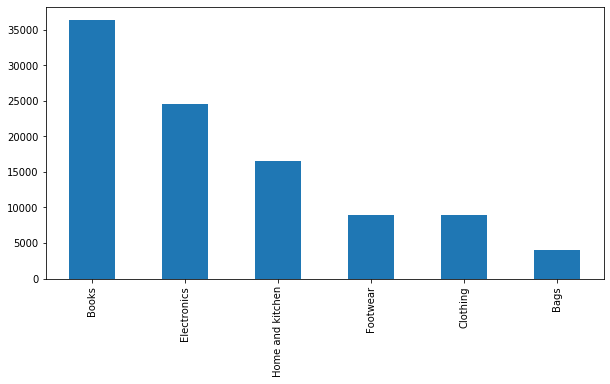

In [25]:
Customer_Final['prod_cat'].value_counts().plot('bar' , figsize = (10,5))


# Product Sub Catgory

C:\Users\POOJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Frenquency Bar For Categorical Variables PRODUCT SUB CATEGORY')

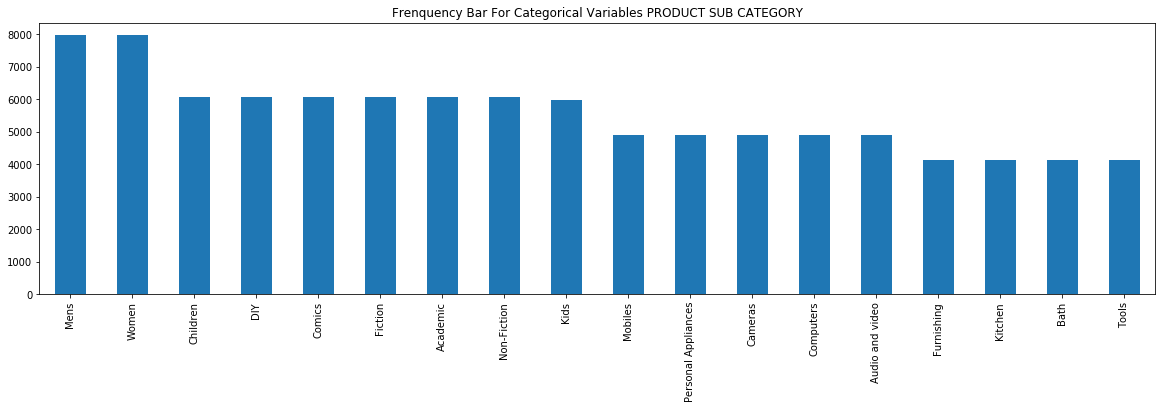

In [26]:
Customer_Final['prod_subcat'].value_counts().plot('bar', figsize = (20,5))
plt.title("Frenquency Bar For Categorical Variables PRODUCT SUB CATEGORY", color ="BLACK" )


# 4. Calculate the following information using the merged dataset :
    
    a. Time period of the available transaction data 
    
    b. Count of transactions where the total amount of transaction was negative 

# a. Time period of the available transaction data 

In [27]:
from datetime import datetime,timedelta
df = Customer_Final
df.DOB = pd.to_datetime(df.DOB)
df.tran_date = pd.to_datetime(df.tran_date)
df.tran_date.max()-df.tran_date.min()

Timedelta('1430 days 00:00:00')

# b. Count of transactions where the total amount of transaction was negative 

In [28]:
df = Customer_Final['total_amt']
count2 = Customer_Final.loc[(df<0),['total_amt']].count()
count2


total_amt    9294
dtype: int64

In [37]:
# Popular among Male
M = Customer_Final.loc[Customer_Final['Gender']=='M']
group_prod = M.groupby(['prod_cat'])['total_amt'].sum()
popular_M = group_prod.nlargest(1)
display('The most popular product category in Male customers is : ',popular_M)

# Popular among Female
F = Customer_Final.loc[Customer_Final['Gender']=='F']
group_prod1 = F.groupby(['prod_cat'])['total_amt'].sum()
popular_F = group_prod1.nlargest(1)
display('The most popular product category in Female customers is : ',popular_F)


'The most popular product category in Male customers is : '

prod_cat
Books    39875836.65
Name: total_amt, dtype: float64

'The most popular product category in Female customers is : '

prod_cat
Books    36988153.41
Name: total_amt, dtype: float64

# 6. Which City code has the maximum customers and what was the percentage of customers from that city? 

In [68]:
max_cust = Customer['city_code'].value_counts()
t = max_cust.nlargest(1)

display("City code which has Maximum customers is : ",t)

#percentage of customers from city code 3
tot_customer = Customer['customer_Id'].count()
percent = round((595/tot_customer)*100,2)
print("Percentage of customers from the city code 3 is {}% : ".format(percent))


'City code which has Maximum customers is : '

3.0    595
Name: city_code, dtype: int64

Percentage of customers from the city code 3 is 10.54% : 


# 7. Which store type sells the maximum products by value and by quantity? 

In [30]:
sort_list = Customer_Final.sort_values(['total_amt','Qty'],ascending = False)
display(sort_list.head(1)['Store_type'])


47986    TeleShop
Name: Store_type, dtype: object

# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores? 

In [31]:
df = pd.DataFrame(Customer_Final)
ta = df[df.prod_cat.isin(['Electronics','Clothing']) & (df.Store_type == 'Flagship store')]
total = ta.total_amt.sum()
print('Total amount earned',total)


Total amount earned 14658949.89


# 9. What was the total amount earned from "Male" customers under the "Electronics" category? 

In [32]:
ta1 = df[(df.Gender == 'M') & (df.prod_cat == 'Electronics')]
total = ta1.total_amt.sum()
print('Total amount earned',total)


Total amount earned 28515547.125


# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts? 

In [33]:
df1 = df[(df.total_amt > 0)]
ts = df1.transaction_id.nunique()
print('Total customers having more than 10 unique transactions are - ',ts)


Total customers having more than 10 unique transactions are -  20876


# 11. For all customers aged between 25 - 35, find out: 

a. What was the total amount spent for “Electronics” and “Books” product categories?  


b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


# a. What was the total amount spent for “Electronics” and “Books” product categories?  

In [35]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(df['DOB']).year          #extract year from DOB
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
df['age'] = (np.where(dob_year > curr_year,v,y))
df

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat,age
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction,50
1,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic,50
2,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction,50
3,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children,50
4,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,1992-12-17,M,2.0,10440850091,271772,2013-04-26,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,1,Women,28
99289,271772,1992-12-17,M,2.0,10440850091,271772,2013-04-26,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,3,Kids,28
99290,269626,1992-12-27,F,5.0,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,4,Mens,28
99291,269626,1992-12-27,F,5.0,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,1,Women,28


In [36]:
total = df.loc[((df.age >25) & (df.age <35)) & ((df.prod_cat=='Books') | (df.prod_cat=='Electronics'))]['total_amt'].sum()
print('Total amount spent',total)


Total amount spent 38905651.06999999


# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [76]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

t_date = Customer_Final[(Customer_Final['tran_date'] > '2014-01-01') & (Customer_Final['tran_date'] < '2014-03-01')]
total_amount = t_date.total_amt.sum()
print('Total amount spent by the customer - ',total_amount)


Total amount spent by the customer -  5591225.965
